# Signature
------
Alexandre Dufresne-Nappert

20948586

# Exercise 1 
--------
An image $f$ is characterized by the probability density function (pdf) shown in Fig. 1. (The numbers inside the shaded boxes specify their respective areas. Assume the pdf is piecewise-constant within each box.)

## Question 1 
------
Design a 1-bit uniform scalar quantizer for this image on the support shown in Fig. 1. Specify the decision threshold(s) and representation levels.


In [65]:
def Quantizer(value:float):
    if (value > 0.5):
        return 0.75
    else:
        return 0.25

# Exercise 2 
------
Let $f$ be an image with intensities in $\{0,1,...,255\}$. Let $p_f(k)$ denote its normalized histogram (pmf), and

$$
F_f()k=\sum^k_{i=1}p_f(i)
$$

its cumulative distribution function (cdf). Assume intensity transformations are implemented via a monotone lookup table (LUT)
$$
g(x) =T(f(x))
$$

where $T : \{0, \dots, 255\} \rightarrow \{0, \dots, 255\}$ is non decreasing. 

## Question 2
-----
i) State a necessary and sufficient condition on the $LUT$ $T$ for the map ping $f → g$ to be invertible. 

ii) Is histogram equalization invertible in practice? Explain carefully. 

iii) Consider applying histogram equalization to an image $f$ to obtain $f_{eq}$, and then applying histogram equalization again to$f_{eq}$. Will the second equalization change the image? Explain. 

iv) (Small experiment) Apply histogram equalization to a test image (e.g., cameraman). Then construct an approximate inverse mapping using the empirical cdf of the equalized image and apply it. Compare the recovered image with the original. Report PSNR/SSIM and briefly comment on what you observe.
 

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, metrics

def equalization(image):
    
    # Get the Dimensions of the Image
    pixels = image.flatten()
    
    # Generate the Histogram using Numpy
    histogram, _ = np.histogram(pixels * 255, bins=256, range=(0, 256))
    
    # Create the Cumlative Distribution Function
    cdf = histogram.cumsum()
    cdf_normalized = cdf / cdf.max()
    
    # Create a Lookup Table to map the old pixel values to the CDF
    LUT = np.round(cdf_normalized * 255).astype('uint8')
    
    # Convert the image to the 8-bit pixel integer values
    img_int = np.round(image * 255).astype('uint8')
    
    # Convert the image using the Lookup Table
    img_equalized = LUT[img_int]
    
    #Return the nomarlized image again
    return img_equalized / 255.0

def PSNR (original_image, modified_image):
    # Get the max Image Value
    maxVal = np.max(original_image)
    
    # Get the Number of pixels contained in the image
    length = original_image.flatten().size
    
    # Calculate the Mean Square Error
    MSE = np.linalg.norm(original_image.flatten() - modified_image.flatten())
    
    #Return PSNR
    return 20*np.log10(np.sqrt(length)*maxVal/MSE)
    
def SSIM (original_image, modified_image):
    
    mu1 = np.average(original_image)
    mu2 = np.average(modified_image)
    
    sigma1 = np.std(original_image)
    sigma2 = np.std(modified_image)
    
    covariance = np.cov(original_image.flatten(), modified_image.flatten())[0, 1]
    
    C1 = 0.000001
    C2 = 0.000009
    
    return ((2*mu1*mu2+C1)*(2*covariance+C2))/((mu1**2 + mu2**2 + C1)*(sigma1**2 + sigma2**2 + C2))
    
# Create the Inverse Equalization function
def inverse_equalize(img_equalized, original_img):
    hist, bin_centers = exposure.histogram(original_img)
    cdf = hist.cumsum() / hist.sum()

    img_recovered = np.interp(img_equalized.flatten(), cdf, np.linspace(0, 1, 256))
    return img_recovered.reshape(img_equalized.shape)

[[4.07535563e-04 4.53671665e-04 4.22914264e-04 ... 3.61399462e-04
  3.46020761e-04 3.46020761e-04]
 [3.76778162e-04 4.07535563e-04 4.53671665e-04 ... 3.76778162e-04
  3.76778162e-04 3.76778162e-04]
 [3.46020761e-04 3.92156863e-04 4.38292964e-04 ... 3.61399462e-04
  3.46020761e-04 3.30642061e-04]
 ...
 [1.30718954e-04 2.30680507e-05 1.61476355e-04 ... 2.30680507e-05
  3.84467512e-05 9.99615532e-05]
 [1.76855056e-04 3.84467512e-05 2.84505959e-04 ... 1.15340254e-04
  7.68935025e-06 1.46097655e-04]
 [1.22260669e-03 1.26874279e-03 1.37639369e-03 ... 1.23798539e-03
  1.28412149e-03 1.23798539e-03]]
0.001945405613229867


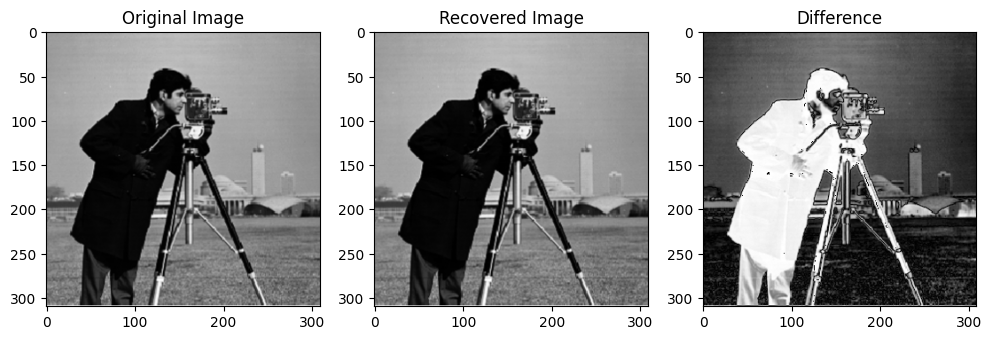

PSNR: 59.99 dB
SSIM: 0.9993
PSNR: 59.99 dB
SSIM: 1.0000


In [ ]:
# Setting reproduceable seed
np.random.seed(20260219)

image = io.imread("Cameraman.png", as_gray=True)

eq_img = exposure.equalize_hist(image)

img_recovered = inverse_equalize(eq_img, image)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(img_recovered, cmap="gray")
ax[1].set_title("Recovered Image")

diff = np.abs(image - img_recovered)
ax[2].imshow(diff, cmap="gray")
ax[2].set_title("Difference")

plt.show()

psnr_val = metrics.peak_signal_noise_ratio(image, img_recovered)
ssim_val = metrics.structural_similarity(image, img_recovered, data_range=1.0)

print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")

print(f"PSNR: {PSNR(image, img_recovered):.2f} dB")
print(f"SSIM: {SSIM(image, img_recovered):.4f}")

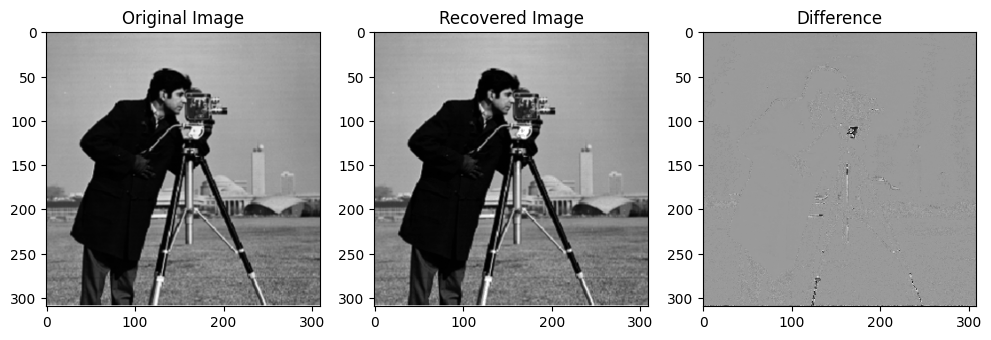

PSNR: 49.34 dB
SSIM: 0.9992
PSNR: 49.34 dB
SSIM: 0.9999


In [68]:
# Setting reproduceable seed
np.random.seed(20260219)

image = io.imread("Cameraman.png", as_gray=True)

eq_img = equalization(image)

img_recovered = inverse_equalize(eq_img, image)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(img_recovered, cmap="gray")
ax[1].set_title("Recovered Image")

diff = image - img_recovered
ax[2].imshow(diff, cmap="gray")
ax[2].set_title("Difference")

plt.show()

psnr_val = metrics.peak_signal_noise_ratio(image, img_recovered)
ssim_val = metrics.structural_similarity(image, img_recovered, data_range=1.0)

print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")

print(f"PSNR: {PSNR(image, img_recovered):.2f} dB")
print(f"SSIM: {SSIM(image, img_recovered):.4f}")


# Exercise 3
------
We consider the linear model
$$
\vec g = \mathbf{H}\cdot \vec f+\vec \varepsilon
$$

where $f$ is an $N\times M$ image, $\vec f = vec(f) \in \mathbb{R}^K, K=NM$ and $\mathbf{H}$ represents 2D convolution with a kernel $h$. The noise $\vec \varepsilon$ is non zero-mean white Gaussian.

In this exercise you will recover $f$ using optimization methods, without ever forming the $\mathbf{H}$ matrix explicitly

Data generation
- Load the image `Cameraman`
- Generate a blur kernel using `fspecial('gaussian', [7, 9], 1.5)`
- Form the blurred image using zero-padded convolution using function `conv2` :
$$g=h\cdot f$$
and retain the output of size $(N+6)\times(M+8)$ (i.e., “full” convolution).

- Add zero-mean Gaussian noise with standard deviation $\sigma = 5$

The resulting image $g$ is your observation


## Part A : Convolution as a Linear Operator and it's Adjoint
----
### Question 3
------
Verify numerically that for arbitrary images $\vec f$ and $\vec u$
$$
\langle \mathbf{H}\vec f, \vec u\rangle =\langle \vec f, \mathbf{H}^T \vec u\rangle
$$


In [ ]:
import numpy as np
from skimage import io
from scipy.signal import convolve2d

# Load the Cameraman Image
image = io.imread("Cameraman.png", as_gray=True)

# Create the coordinate matrices
rows = np.arange(7) 
cols = np.arange(9)
J, I = np.meshgrid(cols, rows)

# Create the h Kernel
h = np.zeros((7, 9))
h[I, J] = np.exp(-((I - 3)**2 + (J - 4)**2)/4.5)
h /= np.sum(h)

# Convolute the Kernel and the Image
Hf = convolve2d(image, h, mode="full")

# Make the Output Image equal to u
u = Hf

# Flip the kernel and then convolute with output image
h_flipped = np.flip(h)
Htu = convolve2d(u, h_flipped, mode="valid")

# Compute the Dot Product on both sides
left_side = np.dot(Hf.flatten(), u.flatten())
right_side = np.dot(image.flatten(), Htu.flatten())

# Display the Results
print(f"Left Side:  {left_side}")
print(f"Right Side: {right_side}")
print(f"Difference: {abs(left_side - right_side)}")


Left Side:  395989.39846499
Right Side: 395989.3984649902
Difference: 1.7462298274040222e-10


## Part B : Tikhonov Regularization
-------
Consider
$$ \min_{\vec{f}} \left\{ \frac{1}{2} \|\mathbf{H}\vec{f} - \vec{g}\|_2^2 + \frac{\lambda}{2} \|\vec{f}\|_2^2 \right\}. $$

Where $||\cdot ||_2$ stands for the standard Euclidean norm.


### Question 3
-------
Implement gradient descent using only `conv2` (with appropriate bound ary handling).Do not form matrices.


In [70]:
import numpy as np
from scipy.signal import convolve2d

def GradientDescentTikhonov(g, h, lam, alpha, iterationNum):
    """Solves the Tikhonov equation using Gradient Descent
    
    ## Params:
        g - Observed Blurry Image
        h - Blur Kernel
        lam - Regularization Parameter
        alpha - Learning Rate
        iterationNum - Number of iterations to apply for Gradient Descent
    """
    # Flip the h Kernel
    hFlip = np.flipud(np.fliplr(h))
    
    fCurrent = np.zeros((g.shape[0] - h.shape[0] + 1, 
                          g.shape[1] - h.shape[1] + 1))
    
    # Go through gradient descent iterations
    for i in range(iterationNum):
        
        # Convolve and Cache Hf 
        Hf = convolve2d(fCurrent, h, mode="full")
        
        # Calculate the residual
        residual = Hf - g
        
        # Get the Transpose Residual
        HtResidual = convolve2d(residual, hFlip, mode="valid")

        # Calculate the gradient|
        gradient = HtResidual + lam * fCurrent
        
        # Update the Image estimate
        fCurrent = fCurrent - alpha * gradient
        
        # Debug info
        if i % 20 == 0:
            loss = 0.5 * np.sum(residual**2) + 0.5 * lam * np.sum(fCurrent**2)
            print(f"Iteration {i}: Loss = {loss:.4f}")
            
    return fCurrent
    

### Question 4 
------
Experiment with at least five values of $\lambda \in [10^{-4}, 10^{-1}]$. For each case  report PSNR/SSIM and display the reconstruction.

Iteration 0: Loss = 12379.9814
Iteration 20: Loss = 219.9473
Iteration 40: Loss = 12.3699
Iteration 60: Loss = 5.0941
Iteration 80: Loss = 3.5539
Iteration 100: Loss = 2.8423
Iteration 120: Loss = 2.4388
Iteration 140: Loss = 2.1840
Iteration 160: Loss = 2.0112
Iteration 180: Loss = 1.8878
Iteration 200: Loss = 1.7960
Iteration 220: Loss = 1.7256
Iteration 240: Loss = 1.6702
Iteration 260: Loss = 1.6258
Iteration 280: Loss = 1.5894
Iteration 300: Loss = 1.5592
Iteration 320: Loss = 1.5337
Iteration 340: Loss = 1.5121
Iteration 360: Loss = 1.4935
Iteration 380: Loss = 1.4773
Iteration 400: Loss = 1.4632
Iteration 420: Loss = 1.4508
Iteration 440: Loss = 1.4397
Iteration 460: Loss = 1.4299
Iteration 480: Loss = 1.4210
Iteration 500: Loss = 1.4131
Iteration 520: Loss = 1.4059
Iteration 540: Loss = 1.3993
Iteration 560: Loss = 1.3933
Iteration 580: Loss = 1.3879
Iteration 600: Loss = 1.3828
Iteration 620: Loss = 1.3782
Iteration 640: Loss = 1.3739
Iteration 660: Loss = 1.3700
Iteration 680

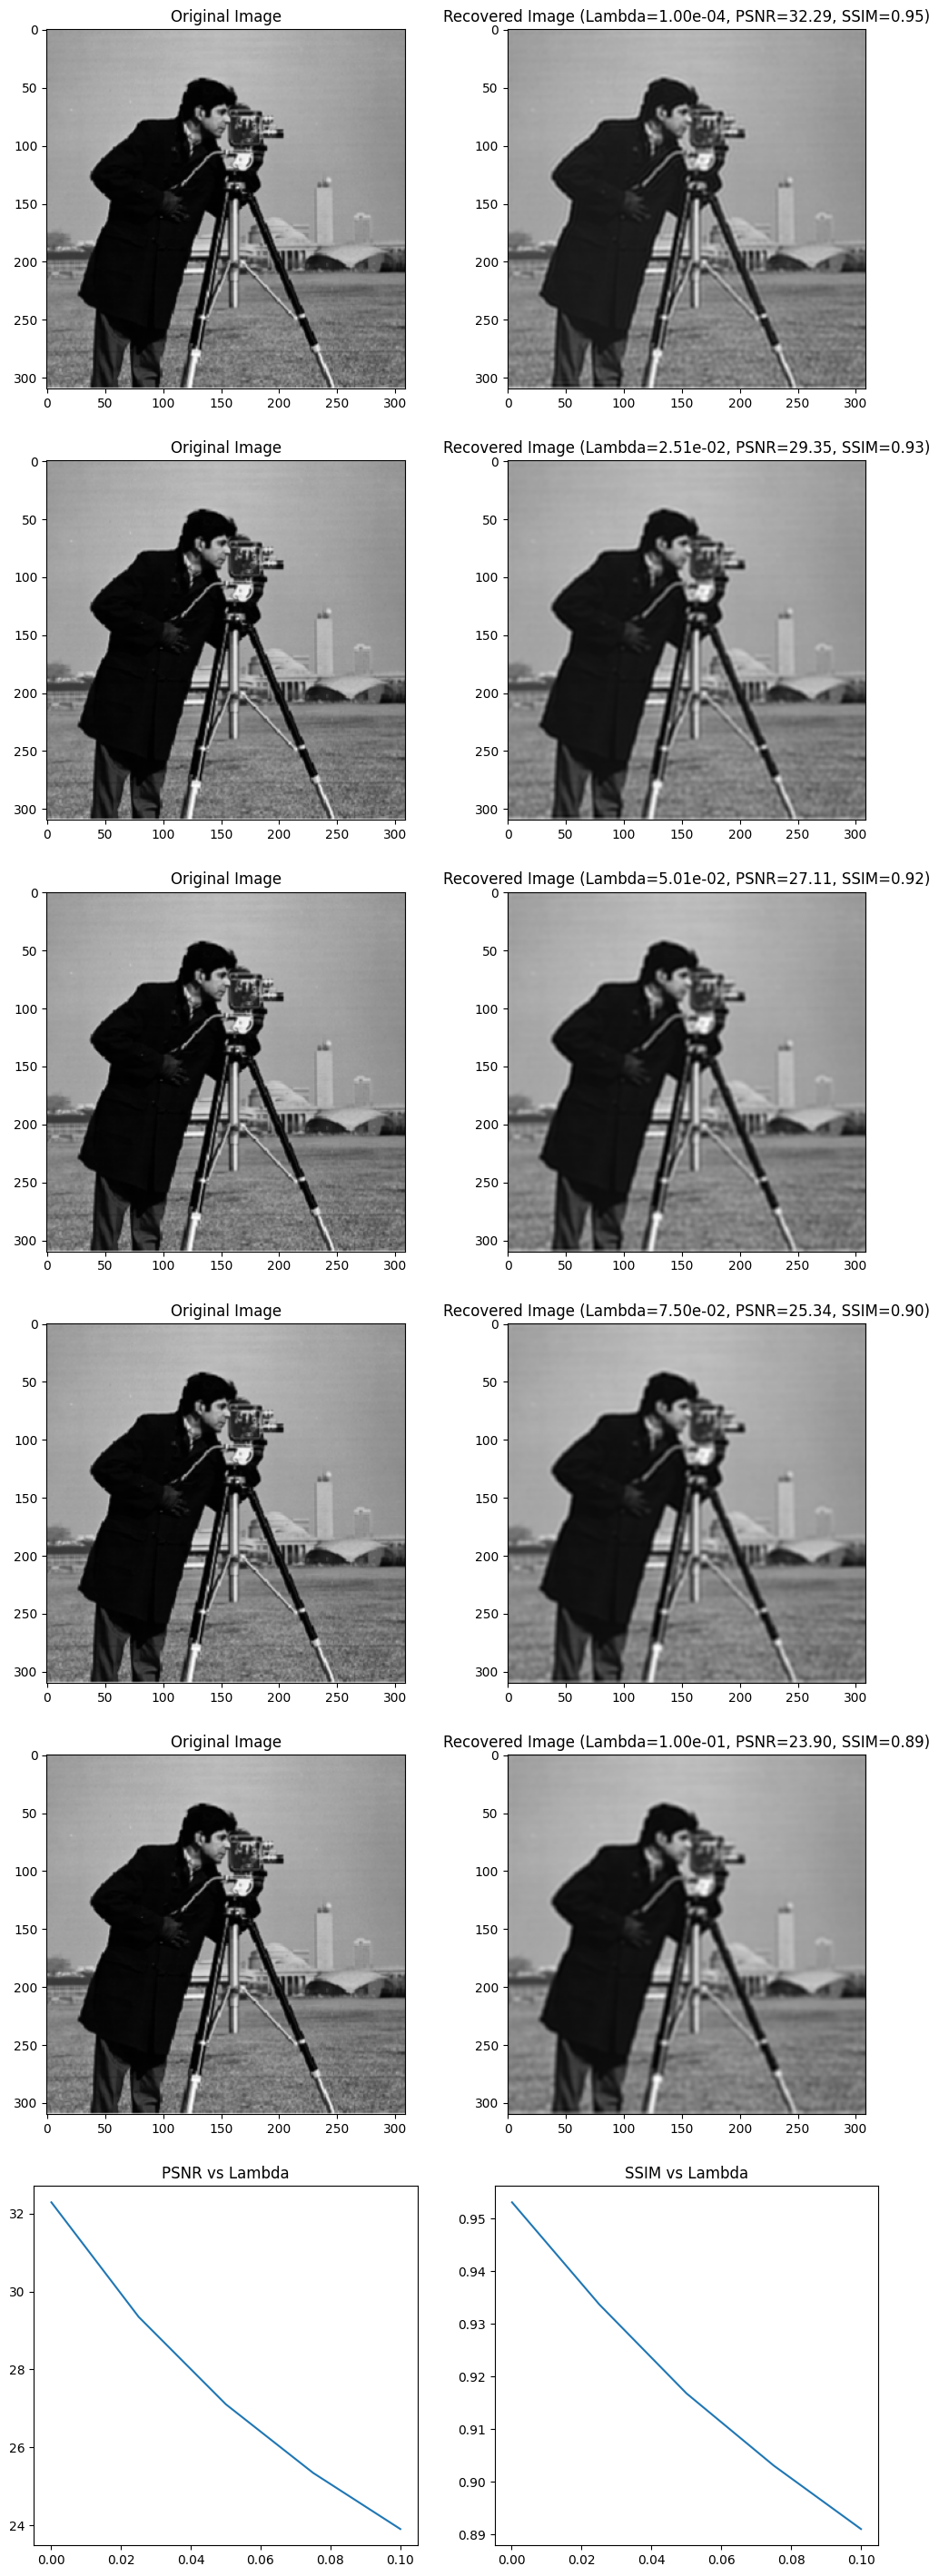

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, metrics
from scipy.signal import convolve2d

# Number of 
N = 5

# Generate 10 vals for Lambda and Define Alpha Value
lams = np.linspace(10**(-4), 10**(-1), N)
alpha = 0.1

# Load the Cameraman Image
image = io.imread("Cameraman.png", as_gray=True)

# Create the coordinate matrices
rows = np.arange(7) 
cols = np.arange(9)
J, I = np.meshgrid(cols, rows)

# Create the h Kernel
h = np.zeros((7, 9))
h[I, J] = np.exp(-((I - 3)**2 + (J - 4)**2)/4.5)
h /= np.sum(h)

# Convolute the Kernel and the Output Image
g = convolve2d(image, h, mode="full")

plt.close()
fig, ax = plt.subplots(N+1, 2, figsize=(12, (N+1)*6))

PSNRs = []
SSIMs = []

for i in range(N):
    recoveredImage = GradientDescentTikhonov(g, h, lams[i], alpha, 1000)
    
    PSNRVal = metrics.peak_signal_noise_ratio(image, recoveredImage)
    SSIMVal = metrics.structural_similarity(image, recoveredImage, data_range=1.0)

    PSNRs.append(PSNRVal)
    SSIMs.append(SSIMVal)

    print(f"Lambda : {lams[i]:.4f}")
    print(f"PSNR: {PSNRVal:.2f} dB")
    print(f"SSIM: {SSIMVal:.4f}")
    
    ax[i, 0].imshow(image, cmap="gray")
    ax[i, 0].set_title("Original Image")

    ax[i, 1].imshow(recoveredImage, cmap="gray")
    ax[i, 1].set_title(f"Recovered Image (Lambda={lams[i]:.2e}, PSNR={PSNRVal:.2f}, SSIM={SSIMVal:.2f})")

ax[N, 0].set_title("PSNR vs Lambda")
ax[N, 0].plot(lams, PSNRs)

ax[N, 1].set_title("SSIM vs Lambda")
ax[N, 1].plot(lams, SSIMs)
    
plt.show()


## Part C : Total Variation (TV) regularization
------
Consider
$$
 \min_{\vec{f}} \left\{ \frac{1}{2} \|\mathbf{H}\vec{f} - \vec{g}\|_2^2 + \lambda \|\vec{f}\|_{TV} \right\}. 
$$

Use the discrete isotropic TV 
$$ \|f\|_{\mathrm{TV}}=\sum_{i, j} \sqrt{\left(D_{x} f_{i, j}\right)^{2}+\left(D_{y} f_{i, j}\right)^{2}+\epsilon^{2}}$$

where $D_x$ and $D_y$ are forward differences and $\epsilon = 10^{-3}$ for numerical stability.


### Question 2 
------
Implement gradient descent using only finite differences and `conv2`.


In [72]:
import numpy as np
from scipy.signal import convolve2d

def GradientDescentTotalVariation(g, h, lam, alpha, iterationNum):
    """Solves the Total Variation using Gradient Descent
    
    ## Params:
        g - Observed Blurry Image
        h - Blur Kernel
        lam - Regularization Parameter
        alpha - Learning Rate
        iterationNum - Number of iterations to apply for Gradient Descent
    """
    # Flip the h Kernel
    hFlip = np.flipud(np.fliplr(h))
    
    fCurrent = np.zeros((g.shape[0] - h.shape[0] + 1, 
                          g.shape[1] - h.shape[1] + 1))
    
    # Define the Epsilon Constant
    eps = 10**(-3)
    
    # Go through gradient descent iterations
    for i in range(iterationNum):
        
        # Convolve and Cache Hf 
        Hf = convolve2d(fCurrent, h, mode="full")
        
        # Calculate the residual
        residual = Hf - g
        
        # Get the Transpose Residual
        HtResidual = convolve2d(residual, hFlip, mode="valid")

        # Perform the forward differences
        dfx = np.diff(fCurrent, axis=1, append=fCurrent[:, -1:])
        dfy = np.diff(fCurrent, axis=0, append=fCurrent[-1:, :])

        # Calculate the Weight
        W = np.sqrt(dfx**2 + dfy**2 + eps**2)

        # Calculate the Phi Values
        phiX = dfx / W
        phiY = dfy / W

        # Calculate the divergence
        divergenceX = np.diff(phiX, axis=1, prepend=0)
        divergenceY = np.diff(phiY, axis=0, prepend=0)

        # Calculate the gradient|
        gradient = HtResidual - lam * (divergenceX + divergenceY)
        
        # Update the Image estimate
        fCurrent = fCurrent - alpha * gradient
        
        # Debug info
        if i % 20 == 0:
            loss = 0.5 * np.sum(residual**2) + 0.5 * lam * np.sum(fCurrent**2)
            print(f"Iteration {i}: Loss = {loss:.4f}")
            
    return fCurrent
    

### Question 3
-----
Compare the results with Tikhonov regularization for comparable PSNR/SSIM levels.


Iteration 0: Loss = 12379.9814
Iteration 20: Loss = 219.7913
Iteration 40: Loss = 12.3481
Iteration 60: Loss = 5.0988
Iteration 80: Loss = 3.5612
Iteration 100: Loss = 2.8494
Iteration 120: Loss = 2.4454
Iteration 140: Loss = 2.1902
Iteration 160: Loss = 2.0171
Iteration 180: Loss = 1.8934
Iteration 200: Loss = 1.8015
Iteration 220: Loss = 1.7309
Iteration 240: Loss = 1.6754
Lambda : 0.0001
PSNR: 30.07 dB
SSIM: 0.9300
Iteration 0: Loss = 12383.0191
Iteration 20: Loss = 473.7499
Iteration 40: Loss = 323.3337
Iteration 60: Loss = 324.6198
Iteration 80: Loss = 324.6481
Iteration 100: Loss = 324.3911
Iteration 120: Loss = 324.2116
Iteration 140: Loss = 324.1112
Iteration 160: Loss = 324.0506
Iteration 180: Loss = 324.0190
Iteration 200: Loss = 324.0003
Iteration 220: Loss = 323.9917
Iteration 240: Loss = 323.9911
Lambda : 0.0251
PSNR: 27.02 dB
SSIM: 0.8402
Iteration 0: Loss = 12386.0567
Iteration 20: Loss = 725.7251
Iteration 40: Loss = 632.6461
Iteration 60: Loss = 642.1634
Iteration 80: 

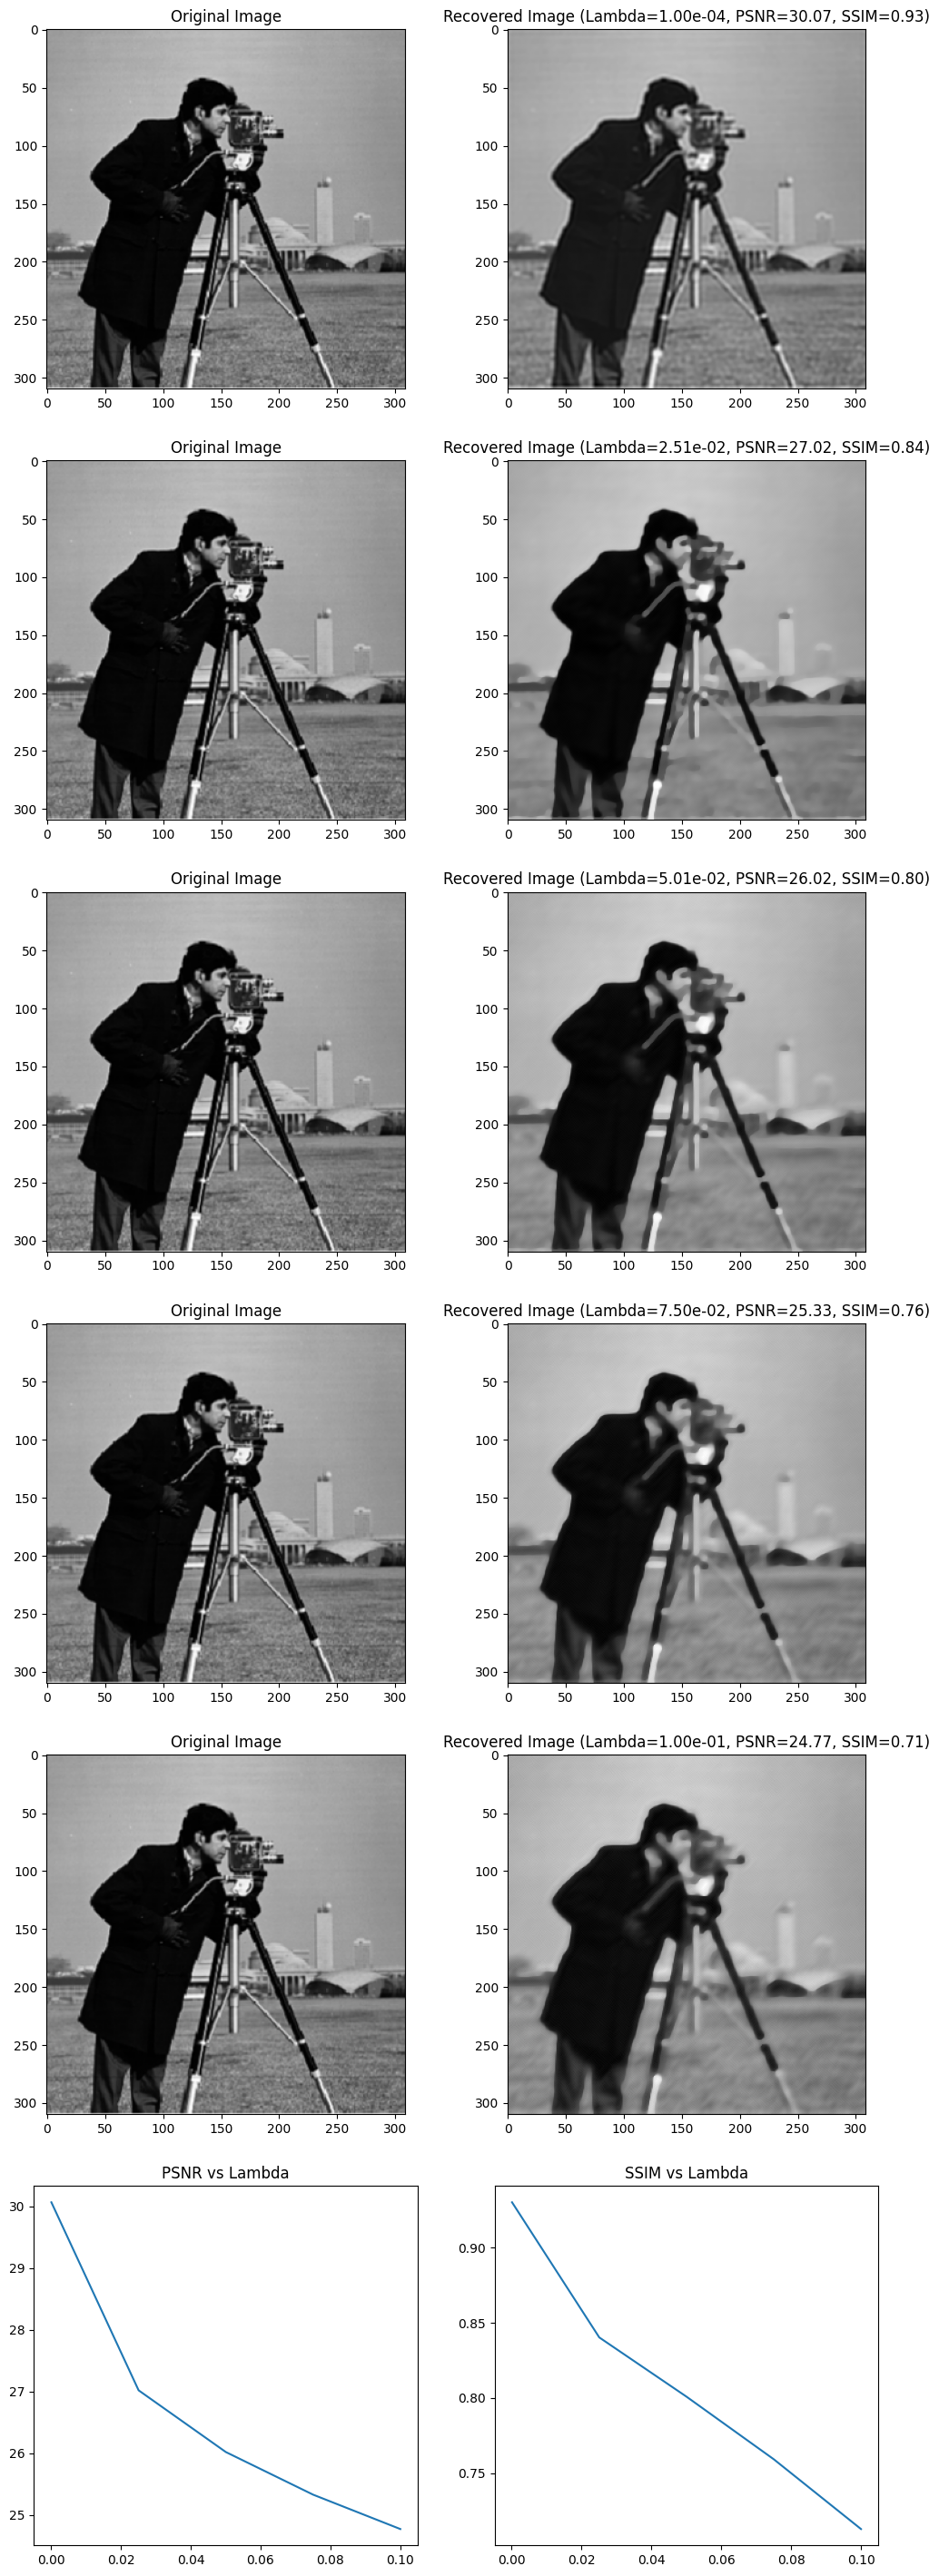

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, metrics
from scipy.signal import convolve2d

# Number of 
N = 5

# Generate 10 vals for Lambda and Define Alpha Value
lams = np.linspace(10**(-4), 10**(-1), N)
alpha = 0.1

# Load the Cameraman Image
image = io.imread("Cameraman.png", as_gray=True)

# Create the coordinate matrices
rows = np.arange(7) 
cols = np.arange(9)
J, I = np.meshgrid(cols, rows)

# Create the h Kernel
h = np.zeros((7, 9))
h[I, J] = np.exp(-((I - 3)**2 + (J - 4)**2)/4.5)
h /= np.sum(h)

# Convolute the Kernel and the Output Image
g = convolve2d(image, h, mode="full")

plt.close()
fig, ax = plt.subplots(N+1, 2, figsize=(12, (N+1)*6))

PSNRs = []
SSIMs = []

for i in range(N):
    recoveredImage = GradientDescentTotalVariation(g, h, lams[i], alpha, 250)
    
    PSNRVal = metrics.peak_signal_noise_ratio(image, recoveredImage)
    SSIMVal = metrics.structural_similarity(image, recoveredImage, data_range=1.0)

    PSNRs.append(PSNRVal)
    SSIMs.append(SSIMVal)

    print(f"Lambda : {lams[i]:.4f}")
    print(f"PSNR: {PSNRVal:.2f} dB")
    print(f"SSIM: {SSIMVal:.4f}")
    
    ax[i, 0].imshow(image, cmap="gray")
    ax[i, 0].set_title("Original Image")

    ax[i, 1].imshow(recoveredImage, cmap="gray")
    ax[i, 1].set_title(f"Recovered Image (Lambda={lams[i]:.2e}, PSNR={PSNRVal:.2f}, SSIM={SSIMVal:.2f})")

ax[N, 0].set_title("PSNR vs Lambda")
ax[N, 0].plot(lams, PSNRs)

ax[N, 1].set_title("SSIM vs Lambda")
ax[N, 1].plot(lams, SSIMs)
    
plt.show()


## Part D : Boundary Effects
--------
Repeat the recovery experiment using circular convolution. Compare the reconstructions near image borders. Explain the differences using the interpretation of $\mathbf{H}^T$.


In [ ]:
import numpy as np
from scipy.signal import convolve2d

def GradientDescentTikhonov(g, h, lam, alpha, iterationNum):
    """Solves the Tikhonov equation using Gradient Descent

    ## Params:
        g - Observed Blurry Image
        h - Blur Kernel
        lam - Regularization Parameter
        alpha - Learning Rate
        iterationNum - Number of iterations to apply for Gradient Descent
    """
    # Flip the h Kernel
    hFlip = np.flipud(np.fliplr(h))

    fCurrent = np.zeros((g.shape[0], g.shape[1]))

    # Go through gradient descent iterations
    for i in range(iterationNum):

        # Convolve and Cache Hf
        Hf = convolve2d(fCurrent, h, mode="same", boundary="wrap")

        # Calculate the residual
        residual = Hf - g

        # Get the Transpose Residual
        HtResidual = convolve2d(residual, hFlip, mode="same", boundary="wrap")

        # Calculate the gradient|
        gradient = HtResidual + lam * fCurrent

        # Update the Image estimate
        fCurrent = fCurrent - alpha * gradient

        # Debug info
        if i % 20 == 0:
            loss = 0.5 * np.sum(residual**2) + 0.5 * lam * np.sum(fCurrent**2)
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return fCurrent


def GradientDescentTotalVariation(g, h, lam, alpha, iterationNum):
    """Solves the Total Variation using Gradient Descent

    ## Params:
        g - Observed Blurry Image
        h - Blur Kernel
        lam - Regularization Parameter
        alpha - Learning Rate
        iterationNum - Number of iterations to apply for Gradient Descent
    """
    # Flip the h Kernel
    hFlip = np.flipud(np.fliplr(h))

    fCurrent = np.zeros((g.shape[0], g.shape[1]))

    # Define the Epsilon Constant
    eps = 10 ** (-3)

    # Go through gradient descent iterations
    for i in range(iterationNum):

        # Convolve and Cache Hf
        Hf = convolve2d(fCurrent, h, mode="same", boundary="wrap")

        # Calculate the residual
        residual = Hf - g

        # Get the Transpose Residual
        HtResidual = convolve2d(residual, hFlip, mode="same", boundary="wrap")

        # Perform the forward differences
        dfx = np.diff(fCurrent, axis=1, append=fCurrent[:, -1:])
        dfy = np.diff(fCurrent, axis=0, append=fCurrent[-1:, :])

        # Calculate the Weight
        W = np.sqrt(dfx**2 + dfy**2 + eps**2)

        # Calculate the Phi Values
        phiX = dfx / W
        phiY = dfy / W

        # Calculate the divergence
        divergenceX = np.diff(phiX, axis=1, prepend=0)
        divergenceY = np.diff(phiY, axis=0, prepend=0)

        # Calculate the gradient|
        gradient = HtResidual - lam * (divergenceX + divergenceY)

        # Update the Image estimate
        fCurrent = fCurrent - alpha * gradient

        # Debug info
        if i % 20 == 0:
            loss = 0.5 * np.sum(residual**2) + 0.5 * lam * np.sum(fCurrent**2)
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return fCurrent

Iteration 0: Loss = 12550.6619
Iteration 20: Loss = 207.7225
Iteration 40: Loss = 9.8548
Iteration 60: Loss = 4.1235
Iteration 80: Loss = 3.0143
Iteration 100: Loss = 2.4899
Iteration 120: Loss = 2.1871
Iteration 140: Loss = 1.9936
Iteration 160: Loss = 1.8612
Iteration 180: Loss = 1.7660
Iteration 200: Loss = 1.6948
Iteration 220: Loss = 1.6399
Iteration 240: Loss = 1.5966
Iteration 260: Loss = 1.5616
Iteration 280: Loss = 1.5329
Iteration 300: Loss = 1.5090
Iteration 320: Loss = 1.4888
Iteration 340: Loss = 1.4716
Iteration 360: Loss = 1.4567
Iteration 380: Loss = 1.4438
Iteration 400: Loss = 1.4324
Iteration 420: Loss = 1.4224
Iteration 440: Loss = 1.4135
Iteration 460: Loss = 1.4056
Iteration 480: Loss = 1.3984
Iteration 500: Loss = 1.3920
Iteration 520: Loss = 1.3861
Iteration 540: Loss = 1.3808
Iteration 560: Loss = 1.3760
Iteration 580: Loss = 1.3715
Iteration 600: Loss = 1.3674
Iteration 620: Loss = 1.3636
Iteration 640: Loss = 1.3601
Iteration 660: Loss = 1.3569
Iteration 680:

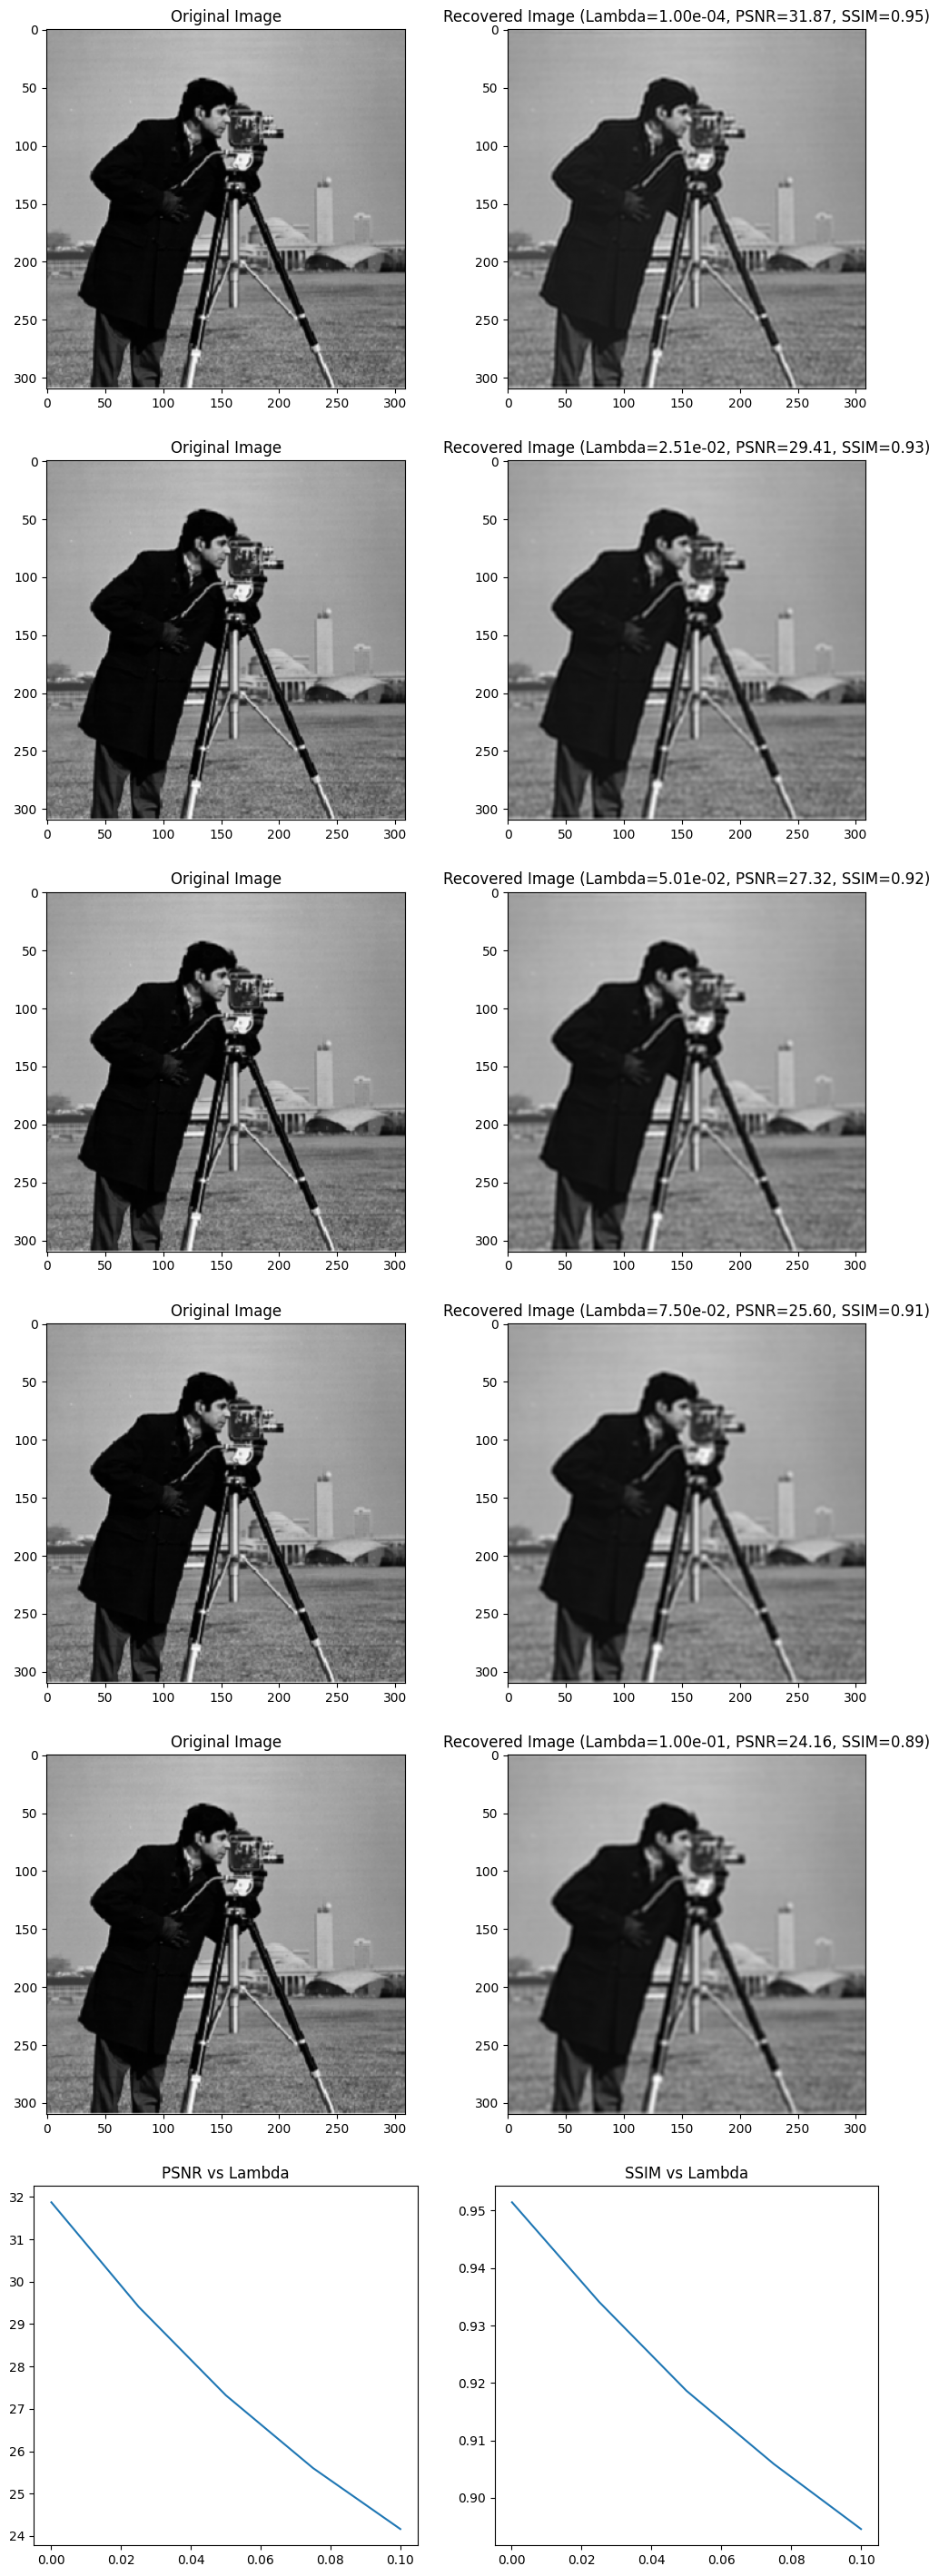

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, metrics
from scipy.signal import convolve2d

# Number of 
N = 5

# Generate 10 vals for Lambda and Define Alpha Value
lams = np.linspace(10**(-4), 10**(-1), N)
alpha = 0.1

# Load the Cameraman Image
image = io.imread("Cameraman.png", as_gray=True)

# Create the coordinate matrices
rows = np.arange(7) 
cols = np.arange(9)
J, I = np.meshgrid(cols, rows)

# Create the h Kernel
h = np.zeros((7, 9))
h[I, J] = np.exp(-((I - 3)**2 + (J - 4)**2)/4.5)
h /= np.sum(h)

# Convolute the Kernel and the Output Image
g = convolve2d(image, h, mode="same", boundary="wrap")

plt.close()
fig, ax = plt.subplots(N+1, 2, figsize=(12, (N+1)*6))

PSNRs = []
SSIMs = []

for i in range(N):
    recoveredImage = GradientDescentTikhonov(g, h, lams[i], alpha, 1000)
    
    PSNRVal = metrics.peak_signal_noise_ratio(image, recoveredImage)
    SSIMVal = metrics.structural_similarity(image, recoveredImage, data_range=1.0)

    PSNRs.append(PSNRVal)
    SSIMs.append(SSIMVal)

    print(f"Lambda : {lams[i]:.4f}")
    print(f"PSNR: {PSNRVal:.2f} dB")
    print(f"SSIM: {SSIMVal:.4f}")
    
    ax[i, 0].imshow(image, cmap="gray")
    ax[i, 0].set_title("Original Image")

    ax[i, 1].imshow(recoveredImage, cmap="gray")
    ax[i, 1].set_title(f"Recovered Image (Lambda={lams[i]:.2e}, PSNR={PSNRVal:.2f}, SSIM={SSIMVal:.2f})")

ax[N, 0].set_title("PSNR vs Lambda")
ax[N, 0].plot(lams, PSNRs)

ax[N, 1].set_title("SSIM vs Lambda")
ax[N, 1].plot(lams, SSIMs)
    
plt.show()


Iteration 0: Loss = 12550.6619
Iteration 20: Loss = 207.5723
Iteration 40: Loss = 9.8415
Iteration 60: Loss = 4.1349
Iteration 80: Loss = 3.0272
Iteration 100: Loss = 2.5017
Iteration 120: Loss = 2.1978
Iteration 140: Loss = 2.0034
Iteration 160: Loss = 1.8703
Iteration 180: Loss = 1.7745
Iteration 200: Loss = 1.7029
Iteration 220: Loss = 1.6476
Iteration 240: Loss = 1.6040
Lambda : 0.0001
PSNR: 30.07 dB
SSIM: 0.9306
Iteration 0: Loss = 12553.7698
Iteration 20: Loss = 465.0041
Iteration 40: Loss = 322.9922
Iteration 60: Loss = 324.7243
Iteration 80: Loss = 324.7394
Iteration 100: Loss = 324.5120
Iteration 120: Loss = 324.3632
Iteration 140: Loss = 324.2868
Iteration 160: Loss = 324.2443
Iteration 180: Loss = 324.2215
Iteration 200: Loss = 324.2107
Iteration 220: Loss = 324.2078
Iteration 240: Loss = 324.2105
Lambda : 0.0251
PSNR: 26.95 dB
SSIM: 0.8390
Iteration 0: Loss = 12556.8776
Iteration 20: Loss = 719.9535
Iteration 40: Loss = 633.7304
Iteration 60: Loss = 642.9114
Iteration 80: L

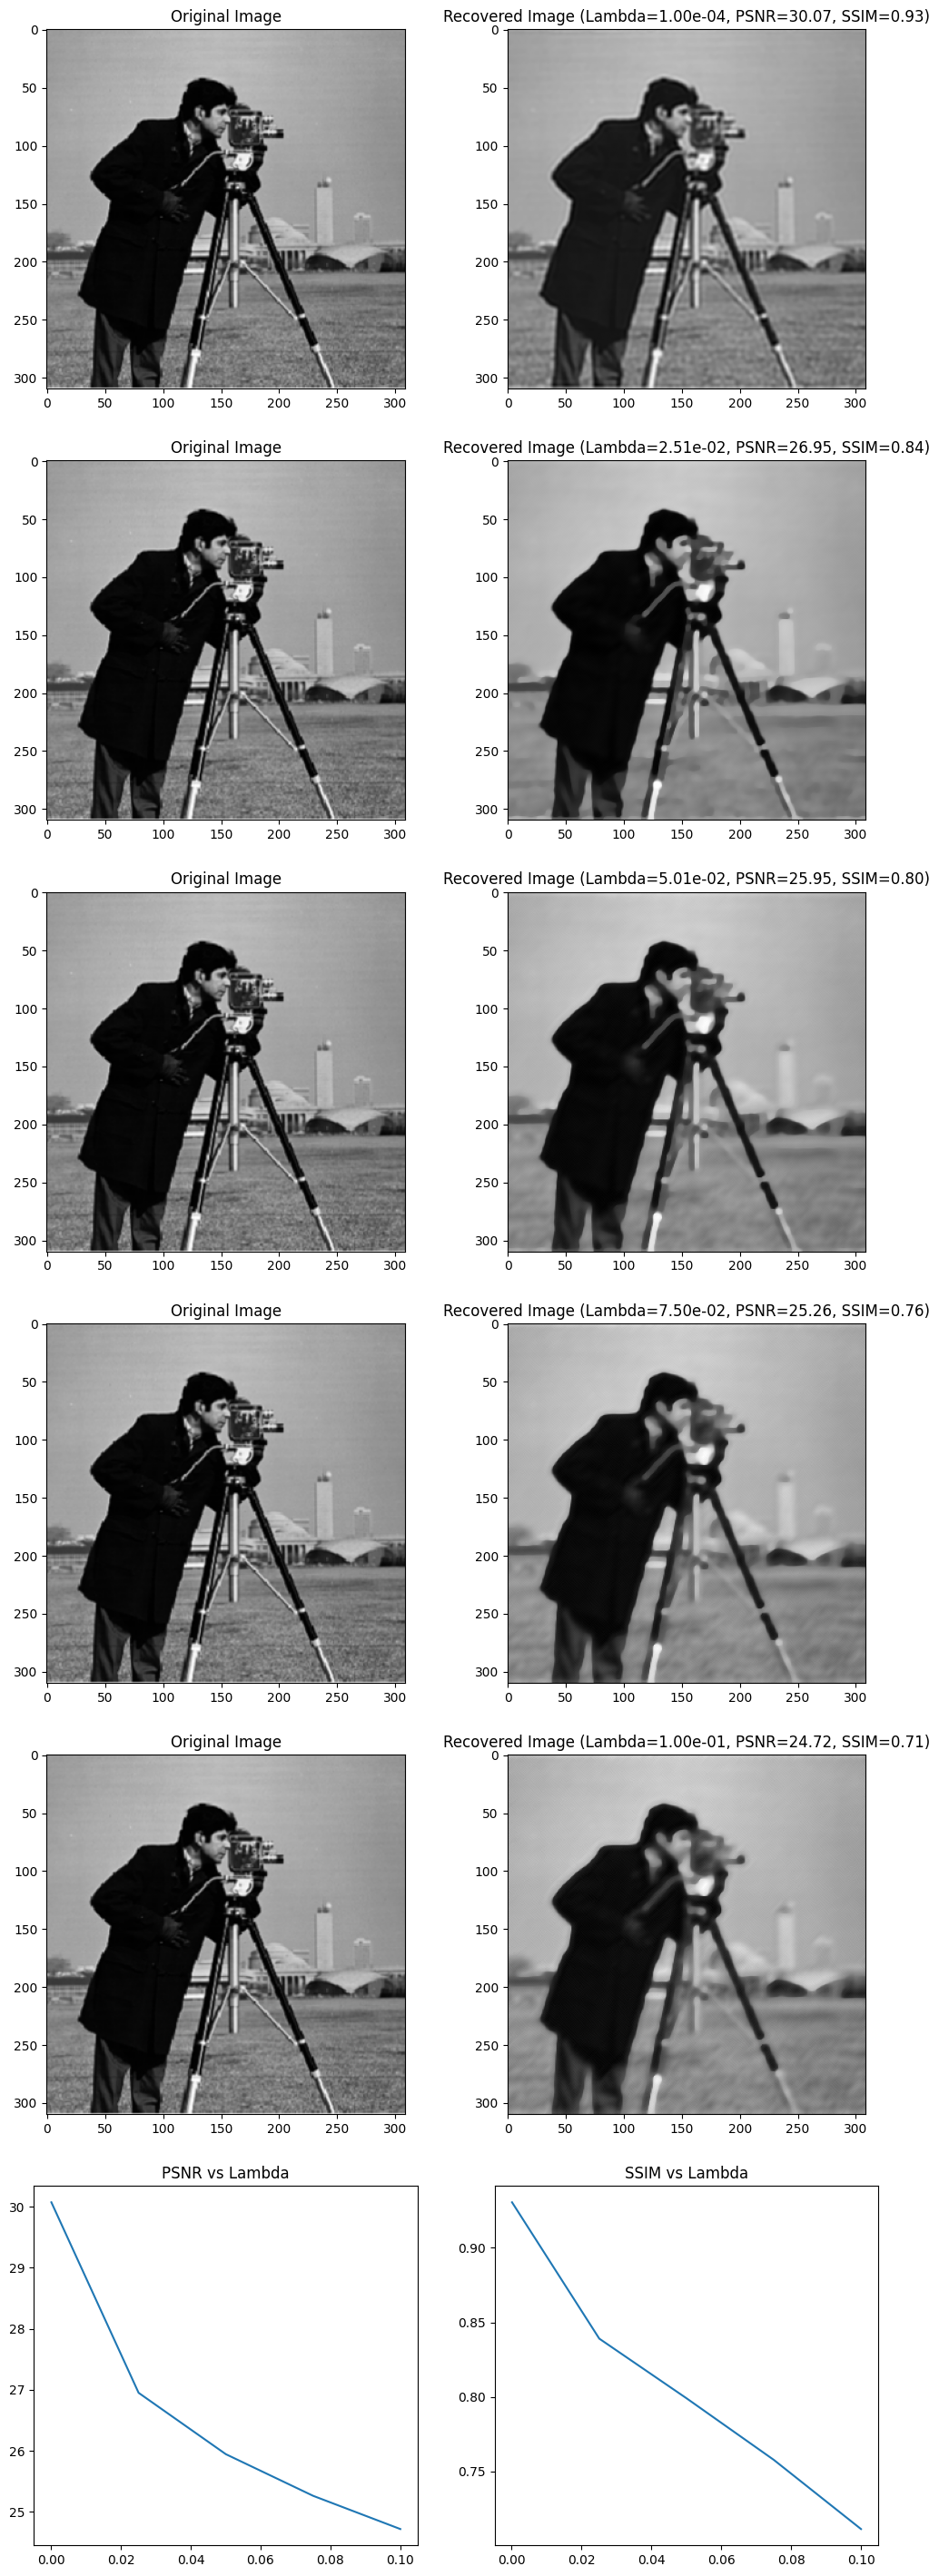

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, metrics
from scipy.signal import convolve2d

# Number of 
N = 5

# Generate 10 vals for Lambda and Define Alpha Value
lams = np.linspace(10**(-4), 10**(-1), N)
alpha = 0.1

# Load the Cameraman Image
image = io.imread("Cameraman.png", as_gray=True)

# Create the coordinate matrices
rows = np.arange(7) 
cols = np.arange(9)
J, I = np.meshgrid(cols, rows)

# Create the h Kernel
h = np.zeros((7, 9))
h[I, J] = np.exp(-((I - 3)**2 + (J - 4)**2)/4.5)
h /= np.sum(h)

# Convolute the Kernel and the Output Image
g = convolve2d(image, h, mode="same", boundary="wrap")

plt.close()
fig, ax = plt.subplots(N+1, 2, figsize=(12, (N+1)*6))

PSNRs = []
SSIMs = []

for i in range(N):
    recoveredImage = GradientDescentTotalVariation(g, h, lams[i], alpha, 250)
    
    PSNRVal = metrics.peak_signal_noise_ratio(image, recoveredImage)
    SSIMVal = metrics.structural_similarity(image, recoveredImage, data_range=1.0)

    PSNRs.append(PSNRVal)
    SSIMs.append(SSIMVal)

    print(f"Lambda : {lams[i]:.4f}")
    print(f"PSNR: {PSNRVal:.2f} dB")
    print(f"SSIM: {SSIMVal:.4f}")
    
    ax[i, 0].imshow(image, cmap="gray")
    ax[i, 0].set_title("Original Image")

    ax[i, 1].imshow(recoveredImage, cmap="gray")
    ax[i, 1].set_title(f"Recovered Image (Lambda={lams[i]:.2e}, PSNR={PSNRVal:.2f}, SSIM={SSIMVal:.2f})")

ax[N, 0].set_title("PSNR vs Lambda")
ax[N, 0].plot(lams, PSNRs)

ax[N, 1].set_title("SSIM vs Lambda")
ax[N, 1].plot(lams, SSIMs)
    
plt.show()
